In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from pyforest import *
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')

## Explaining Dataset
AT - Ambient Temperature <br>
AP - Ambient Pressure<br>
RH - Relative Humidity<br>
EV - Exhaust Vacuum<br>
PE - Plant Energy Output<br>

In [7]:
df_train = pd.read_csv("Training_set_ccpp.csv")
df_test = pd.read_csv("Testing_set_ccpp.csv")
df_train['train_test'] = 0
df_test['train_test'] = 1
df = pd.concat([df_train, df_test])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df

,AT,EV,AP,RH,PE,train_test
0,29.95,73.42,1011.44,66.32,432.81,0
1,5.76,40.07,1013.22,62.99,494.67,0
2,29.44,64.33,1011.40,61.78,442.32,0
3,32.83,74.33,1011.44,50.42,427.36,0
4,16.86,39.63,1004.47,83.50,466.68,0
...,...,...,...,...,...,...
3153,22.12,57.19,1007.56,76.50,NaN,1
3154,9.59,38.56,1017.01,60.10,NaN,1
3155,31.38,71.32,1009.17,60.42,NaN,1
3156,12.38,45.51,1016.15,81.37,NaN,1


In [9]:
df.tail(10)

,AT,EV,AP,RH,PE,train_test
3148,3.74,35.19,1018.58,98.84,NaN,1
3149,23.94,62.08,1022.47,61.97,NaN,1
3150,10.15,41.46,1019.56,81.79,NaN,1
3151,24.64,72.24,1011.37,80.61,NaN,1
3152,14.66,43.13,1014.97,46.31,NaN,1
3153,22.12,57.19,1007.56,76.50,NaN,1
3154,9.59,38.56,1017.01,60.10,NaN,1
3155,31.38,71.32,1009.17,60.42,NaN,1
3156,12.38,45.51,1016.15,81.37,NaN,1
3157,22.35,65.61,1016.27,73.93,NaN,1


## EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 3157
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AT          9568 non-null   float64
 1   EV          9568 non-null   float64
 2   AP          9568 non-null   float64
 3   RH          9568 non-null   float64
 4   PE          6410 non-null   float64
 5   train_test  9568 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 523.2 KB


In [11]:
df.describe()

,AT,EV,AP,RH,PE,train_test
count,9568.000000,9568.000000,9568.000000,9568.000000,6410.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.363276,0.330059
std,7.452473,12.707893,5.938784,14.600269,17.060129,0.470258
min,1.810000,25.360000,992.890000,25.560000,420.260000,0.000000
25%,13.510000,41.740000,1009.100000,63.327500,439.832500,0.000000
50%,20.345000,52.080000,1012.940000,74.975000,451.440000,0.000000
75%,25.720000,66.540000,1017.260000,84.830000,468.270000,1.000000
max,37.110000,81.560000,1033.300000,100.160000,495.760000,1.000000


On observing mean, std deviationa and max value we can say that there are no outliers or very few outilers. TO investigate it further we will visualize this data.

## Nans

In [12]:
df.isnull().sum()

AT               0
EV               0
AP               0
RH               0
PE            3158
train_test       0
dtype: int64

values displayed as Null in PE are nothing but testing data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

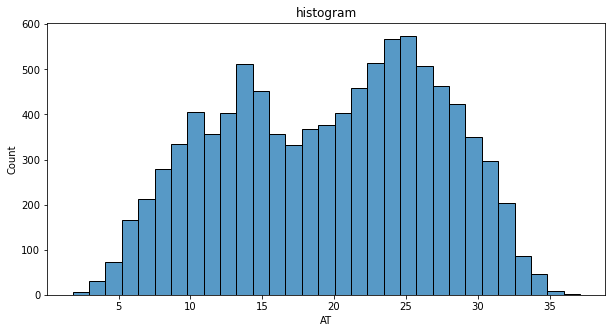

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

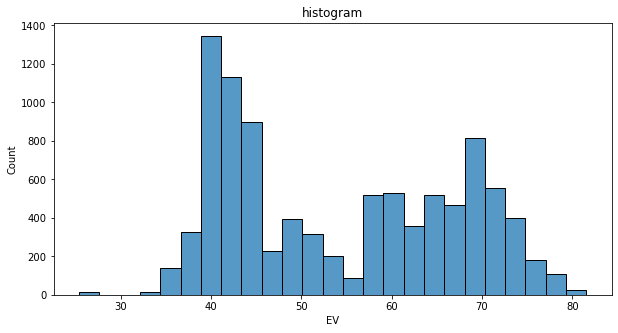

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

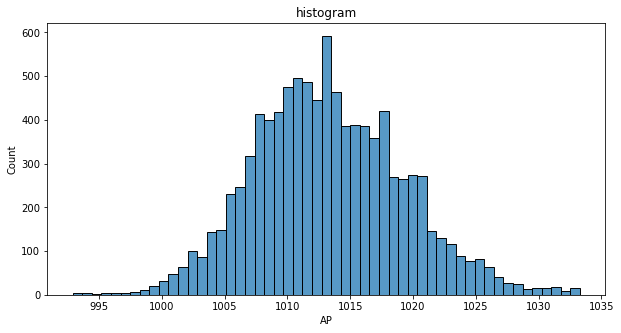

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

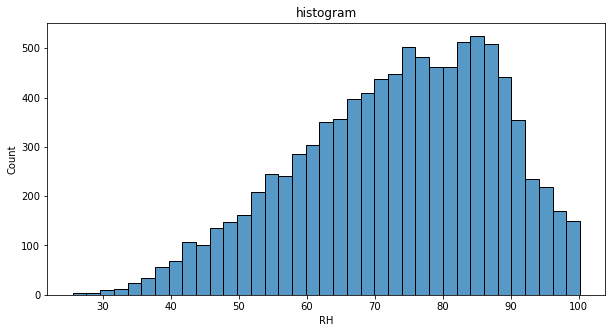

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

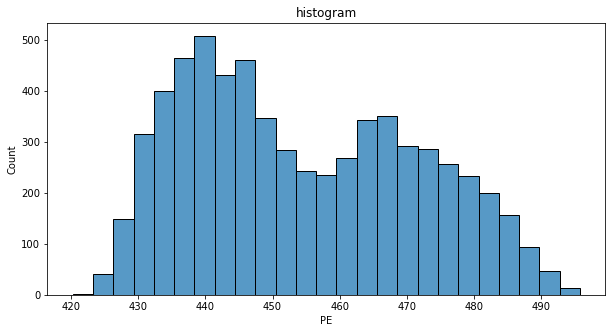

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

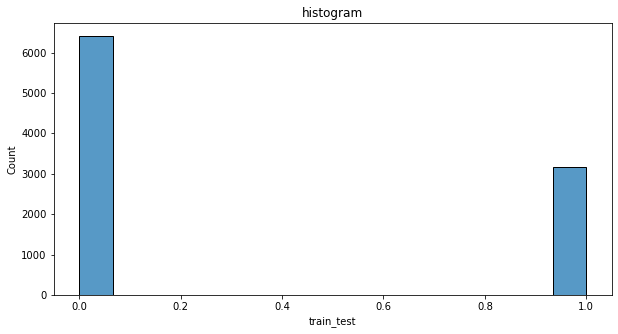

In [14]:
for i in df_train.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i], palette = "viridis")
    plt.title("histogram")
    plt.show()

In [15]:
df_train.columns

Index(['AT', 'EV', 'AP', 'RH', 'PE', 'train_test'], dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

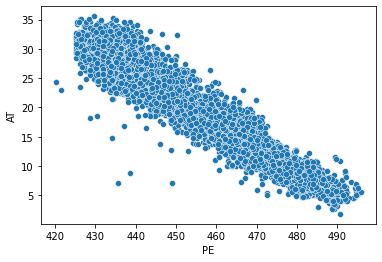

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

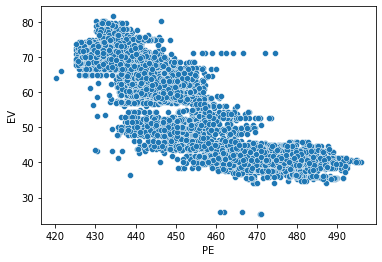

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

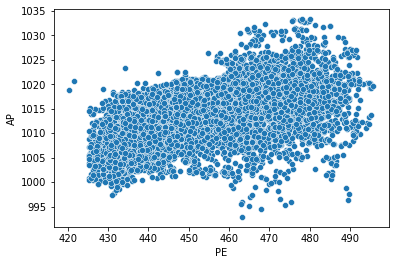

In [16]:
for i in df_train.columns[0:-3]:
    sns.scatterplot(x = "PE", y = i, data = df_train)
    plt.show()

 Observation
- As ambient temperature increases Power output decreases
- Same is the relation for exhaust vacuum
- As ambient pressure increases Ouput increases

## Checking Outlier

from scipy.stats import zscore

z = np.abs(zscore(df_train))
print(z)

threshold = 3
print(np.where(z>3))

df_train_new = df_train[(z<3).all(axis= 1)]

df_train.shape, df_train_new.shape

#data loss
print((6410-6380)*100/6410)

less than 0.5% of data has been lost

#heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

## Scaling


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['AT', 'EV', 'AP', 'RH']] = sc.fit_transform(df[['AT', 'EV', 'AP', 'RH']])

X_train_scaled = df[df.train_test == 0].drop(["train_test", "PE"], axis = 1)
y_train_scaled = df[df.train_test == 0]["PE"]
X_test = df[df.train_test == 1].drop(["train_test" ,"PE"], axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

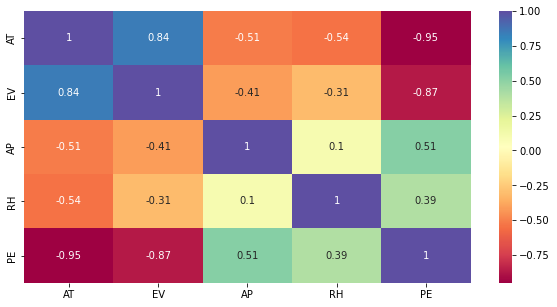

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['AT', 'EV', 'AP', 'RH','PE']].corr(),annot=True,cmap="Spectral")

EV and AT have correlation > 0.6 so we can reduce them into one attr.

In [42]:
X_train_2_scaled = X_train_scaled[['EV', 'AP', 'RH']]#removing one of the col in highly correlated cols 
X_train_3_scaled = X_train_scaled[['AT', 'AP', 'RH']]
X_test_2 = X_test[['EV', 'AP', 'RH']]
X_test_3 = X_test[['AT', 'AP', 'RH']]

## Model Fitting

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.2, random_state=2, shuffle=True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train_2_scaled, y_train_scaled, test_size=0.2, random_state=2, shuffle=True)
    
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_train_3_scaled, y_train_scaled, test_size=0.2, random_state=2, shuffle=True)


## Model Fitting

### Model 1: Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(X_train1, y_train1)

y_pred1 = lr.predict(X_test1)

rscore1 = r2_score(y_test1, y_pred1)
print(rscore1)
cvscore1=cross_val_score(lr,X_train_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore1.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print("\n")

#------------------------------------------------------------------------

lr.fit(X_train2, y_train2)

y_pred2 = lr.predict(X_test2)

rscore2 = r2_score(y_test2, y_pred2)
print(rscore2)
cvscore2=cross_val_score(lr,X_train_2_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore2.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print("\n")

#------------------------------------------------------------------------

lr.fit(X_train3, y_train3)

y_pred3 = lr.predict(X_test3)

rscore3 = r2_score(y_test3, y_pred3)
print(rscore3)
cvscore3=cross_val_score(lr,X_train_3_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore3.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test3, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test3, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print("\n")

0.9302626405402185
Cross Val score :  92.91861586055724
MAE: 3.653452780792703
MSE: 20.395282402687307


<IPython.core.display.Javascript object>

RMSE: 4.5161136392574655


0.8020019002839451
Cross Val score :  80.20417407888374
MAE: 5.947528897217521
MSE: 57.90622401229974


<IPython.core.display.Javascript object>

RMSE: 7.609613920055323


0.9237195238333845
Cross Val score :  92.18638625462849
MAE: 3.7996973783467505
MSE: 22.308872393237202


<IPython.core.display.Javascript object>

RMSE: 4.723226904695264




### Model 2: SVR

In [48]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train1, y_train1)

y_pred1 = svr.predict(X_test1)
rscore1 = r2_score(y_test1, y_pred1)
print(rscore1)
cvscore1=cross_val_score(svr,X_train_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore1.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

#---------------------------------------------------------------------
svr.fit(X_train2, y_train2)

y_pred2 = svr.predict(X_test2)
rscore2 = r2_score(y_test2, y_pred2)
print(rscore2)
cvscore2=cross_val_score(svr,X_train_2_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore2.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

#---------------------------------------------------------------------
svr.fit(X_train3, y_train3)

y_pred3 = svr.predict(X_test3)
rscore3 = r2_score(y_test3, y_pred3)
print(rscore3)
cvscore3=cross_val_score(svr,X_train_3_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore3.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test3, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test3, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

#---------------------------------------------------------------------

0.9426523811117475
Cross Val score :  93.92988485180302
MAE: 3.1246520628242465
MSE: 16.77179766208567


<IPython.core.display.Javascript object>

RMSE: 4.09533852838635
0.832238475724299
Cross Val score :  83.57974487100745
MAE: 5.297775293715193
MSE: 49.06328100767069


<IPython.core.display.Javascript object>

RMSE: 7.004518613557301
0.9346521023865593
Cross Val score :  92.89513033176495
MAE: 3.3740550644523384
MSE: 19.111547046983556


<IPython.core.display.Javascript object>

RMSE: 4.37167554228165


### Model 3: Lasso Regression

In [49]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train1, y_train1)
y_pred1 = ls.predict(X_test1)

rscore1 = r2_score(y_test1, y_pred1)
print(rscore1)
cvscore1=cross_val_score(ls,X_train_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore1.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

#-----------------------------------------------------------------------

ls.fit(X_train2, y_train2)

y_pred2 = ls.predict(X_test2)
rscore2 = r2_score(y_test2, y_pred2)
print(rscore2)
cvscore2=cross_val_score(ls,X_train_2_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore2.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

#---------------------------------------------------------------------
ls.fit(X_train3, y_train3)

y_pred3 = ls.predict(X_test3)
rscore3 = r2_score(y_test3, y_pred3)
print(rscore3)
cvscore3=cross_val_score(ls,X_train_3_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore3.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test3, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test3, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

0.9129553531940335
Cross Val score :  91.36236218692734
MAE: 4.061498225562429
MSE: 25.45694541637611


<IPython.core.display.Javascript object>

RMSE: 5.045487629196618
0.7940313924779638
Cross Val score :  79.53699739387532
MAE: 6.038086777769691
MSE: 60.23726663930889


<IPython.core.display.Javascript object>

RMSE: 7.761267076921712
0.9064678820445132
Cross Val score :  90.67149303537634
MAE: 4.173477873042743
MSE: 27.354261391611175


<IPython.core.display.Javascript object>

RMSE: 5.230130150542258


### Model 4: Decision Tree

In [50]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train1, y_train1)
y_pred1 = dtr.predict(X_test1)

rscore1 = r2_score(y_test1, y_pred1)
print(rscore1)
cvscore1=cross_val_score(dtr,X_train_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore1.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

#-----------------------------------------------------------------------

dtr.fit(X_train2, y_train2)

y_pred2 = dtr.predict(X_test2)
rscore2 = r2_score(y_test2, y_pred2)
print(rscore2)
cvscore2=cross_val_score(dtr,X_train_2_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore2.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

#---------------------------------------------------------------------
dtr.fit(X_train3, y_train3)

y_pred3 = dtr.predict(X_test3)
rscore3 = r2_score(y_test3, y_pred3)
print(rscore3)
cvscore3=cross_val_score(dtr,X_train_3_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore3.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test3, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test3, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

0.9102657217981749
Cross Val score :  91.75866585729295
MAE: 3.432191887675507
MSE: 26.243550936037444


<IPython.core.display.Javascript object>

RMSE: 5.122845980120566
0.8445346049034144
Cross Val score :  86.56415338004993
MAE: 4.261193447737911
MSE: 45.46717371294852


<IPython.core.display.Javascript object>

RMSE: 6.7429350963025385
0.8817440899101788
Cross Val score :  87.5126242475202
MAE: 4.393104524180969
MSE: 34.58494414976601


<IPython.core.display.Javascript object>

RMSE: 5.880896543025222


### Model 5: Random forest

In [51]:
rfr = RandomForestRegressor()
rfr.fit(X_train1, y_train1)
y_pred1 = rfr.predict(X_test1)

rscore1 = r2_score(y_test1, y_pred1)
print(rscore1)
cvscore1=cross_val_score(rfr,X_train_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore1.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

#-----------------------------------------------------------------------

rfr.fit(X_train2, y_train2)

y_pred2 = rfr.predict(X_test2)
rscore2 = r2_score(y_test2, y_pred2)
print(rscore2)
cvscore2=cross_val_score(rfr,X_train_2_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore2.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

#---------------------------------------------------------------------
rfr.fit(X_train3, y_train3)

y_pred3 = rfr.predict(X_test3)
rscore3 = r2_score(y_test3, y_pred3)
print(rscore3)
cvscore3=cross_val_score(rfr,X_train_3_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore3.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test3, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test3, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

0.9588773348589889
Cross Val score :  95.70769299426267
MAE: 2.5068618564742704
MSE: 12.026672291567934


<IPython.core.display.Javascript object>

RMSE: 3.467949291954531
0.9099545848946965
Cross Val score :  92.18949849608504
MAE: 3.460119344773794
MSE: 26.334545563042198


<IPython.core.display.Javascript object>

RMSE: 5.131719552259476
0.9349292855706148
Cross Val score :  93.24237506163084
MAE: 3.3309113884555384
MSE: 19.030482473276116


<IPython.core.display.Javascript object>

RMSE: 4.3623941217267515


### Model 6: XGBoost

In [52]:
from xgboost import XGBRegressor

xbr = XGBRegressor()
xbr.fit(X_train1, y_train1)
y_pred1 = xbr.predict(X_test1)

rscore1 = r2_score(y_test1, y_pred1)
print(rscore1)
cvscore1=cross_val_score(xbr,X_train_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore1.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

#-----------------------------------------------------------------------

xbr.fit(X_train2, y_train2)

y_pred2 = xbr.predict(X_test2)
rscore2 = r2_score(y_test2, y_pred2)
print(rscore2)
cvscore2=cross_val_score(xbr,X_train_2_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore2.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

#---------------------------------------------------------------------
xbr.fit(X_train3, y_train3)

y_pred3 = xbr.predict(X_test3)
rscore3 = r2_score(y_test3, y_pred3)
print(rscore3)
cvscore3=cross_val_score(xbr,X_train_3_scaled,y_train_scaled,cv=5)
print("Cross Val score : ",cvscore3.mean()*100)

print('MAE:', metrics.mean_absolute_error(y_test3, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test3, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

0.9631476004186118
Cross Val score :  96.09260887424888
MAE: 2.376079152028386
MSE: 10.777796901136671


<IPython.core.display.Javascript object>

RMSE: 3.2829555131217774
0.906485581676517
Cross Val score :  92.20511244090291
MAE: 3.758010337698664
MSE: 27.34908498407383


<IPython.core.display.Javascript object>

RMSE: 5.229635263005808
0.9314845819084167
Cross Val score :  92.85896603919532
MAE: 3.4464724964731013
MSE: 20.037915283011646


<IPython.core.display.Javascript object>

RMSE: 4.476373005348376


In [54]:

xbr.fit(X_train1, y_train1)
y_test = xbr.predict(X_test)
print(y_test)
basic_submission = {'PE':y_test}
base_submission = pd.DataFrame(data = basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

[454.18793 435.32635 435.2079  ... 433.0007  471.61374 446.6757 ]


<IPython.core.display.Javascript object>